An example of computing J factor 

#Author: Q.R Liu


In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import os,time
import numpy as np
import matplotlib.pyplot as plt 
from charon import profile
import charon.physicsconstants as PC
pc = PC.PhysicsConstants()

profiles of NFW, Einasto, Burkert, Isothermal, Zhao are implemented. 
default settings (Zhao profiles uses values from Moore) are

|             | $r_s\;[kpc]$  | $\rho_s\;[GeV^2/cm^3]$ | $\alpha$ | $\beta$ | $\gamma$ |
|-------------|---------------|------------------------|----------|---------|----------|
| NFW         | 24.42         | 0.184                  | -        | -       | 1        |
| Einasto     | 28.44         | 0.033                  | 0.17     | -       | -        |
| Burkert     | 12.67         | 0.712                  | -        | -       | -        |
| Isothermal  | 4.38          | 1.387                  | -        | -       | -        |
| Zhao (Moore)| 30.28         | 0.105                  | 1        | 3       | 1.16     |

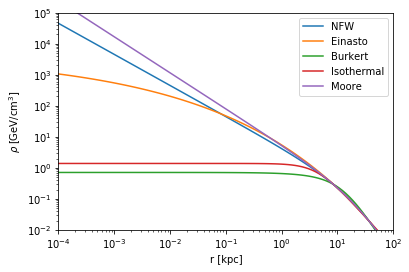

In [3]:
R       = 100.  #maximum of the line of sight in kpc 
d       = 8     #distance from Earth to the Galactic center in kpc
process = 'ann' #decay or ann
theta   = 0.    #angle between the line connecting the Earth and the Galactic Center and the line of sight in radian.
r = np.logspace(-4,2,100)

pros   = [profile.NFW,profile.Einasto, profile.Burkert,profile.Isothermal,profile.Zhao] 
labels = ['NFW','Einasto','Burkert','Isothermal','Moore']
for i in range(5):
    J         = profile.J(pros[i],R,d,process)
    densities = J.density(r)
    plt.plot(r,densities,label=labels[i])

plt.ylim(1e-2,1e5)   
plt.xlim(1e-4,1e2) 
plt.xscale('log')
plt.yscale('log')
plt.xlabel('r [kpc]')
plt.ylabel(r'$\rho\;[\mathrm{GeV/cm^3}]$')
plt.legend()

compute $J(\theta)$

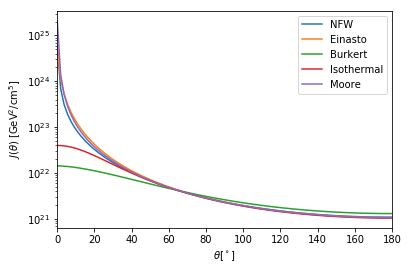

In [4]:
theta = np.linspace(0.,np.pi,100)

for i in range(5):
    J         = profile.J(pros[i],R,d,process)
    Jtheta = [J.Jtheta(j) for j in theta]
    plt.plot(np.rad2deg(theta),Jtheta,label=labels[i])

#plt.ylim(1e-2,1e5)   
plt.xlim(0.,180) 
plt.yscale('log')
plt.xlabel(r'$\theta [^\circ]$')
plt.ylabel(r'$J(\theta)\;[\mathrm{GeV^2/cm^5}]$')
plt.legend()

If include solid angle, for both small and large.

In [5]:
theta_min = np.deg2rad(0.1)
theta_max = np.deg2rad(0.2)

theta_min_integral = np.deg2rad(0.)
theta_max_integral = np.deg2rad(np.pi)

for i in range(5):
    print labels[i]
    J = profile.J(pros[i],R,d,process)
    print 'small solid angle'
    print  J.J(theta_min,theta_max)
    print 'integrate over solid angle'
    print  J.JIntegral(theta_min_integral,theta_max_integral)


NFW
small solid angle
1.4587180999959192e+20
integrate over solid angle
7.169167241330462e+21
Einasto
small solid angle
1.3795915937534843e+20
integrate over solid angle
1.092273874210589e+22
Burkert
small solid angle
4.09562641262538e+17
integrate over solid angle
1.3386950540845842e+20
Isothermal
small solid angle
1.1427290955509048e+18
integrate over solid angle
3.729848751828484e+20
Moore
small solid angle
5.0773357210022694e+20
integrate over solid angle
1.612681358682041e+22


If vary parameters of each profile

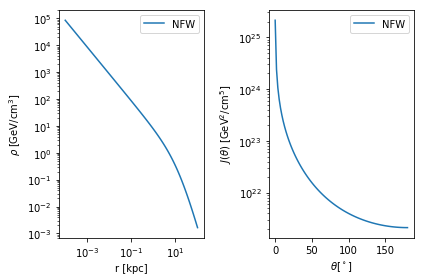

In [6]:
#NFW profile from JCAP 1307, 016 (2013).
rs    = 16.1  #kpc
rhos  = 0.532 #GeV/cm^3
gamma = 1

plt.figure(figsize=(18,15))
fig, ax = plt.subplots(1,2)

J         = profile.J(profile.NFW,R,d,process,rs=rs,rhos=rhos,gamma=gamma)
densities = J.density(r)
ax[0].plot(r,densities,label='NFW')
Jtheta = [J.Jtheta(j) for j in theta]
ax[1].plot(np.rad2deg(theta),Jtheta,label='NFW')

ax[0].set_xscale('log')
ax[0].set_yscale('log')
ax[0].set_xlabel('r [kpc]')
ax[0].set_ylabel(r'$\rho\;[\mathrm{GeV/cm^3}]$')
ax[0].legend()
ax[1].set_yscale('log')
ax[1].set_xlabel(r'$\theta [^\circ]$')
ax[1].set_ylabel(r'$J(\theta)\;[\mathrm{GeV^2/cm^5}]$')
ax[1].legend()

plt.tight_layout()

custom profile

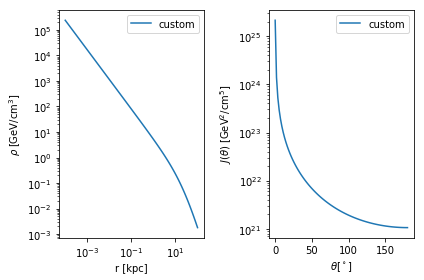

In [7]:
#define a profile (use Zhao profile as an example)

def custom_profile(r,rs=30.28,rhos=0.105,alpha=1.,beta=3.,gamma=1.16):
    return rhos/((r/rs)**gamma*(1.+r**alpha/rs**alpha)**((beta-gamma)/alpha))

plt.figure(figsize=(18,15))
fig, ax = plt.subplots(1,2)
fig.tight_layout()

J         = profile.J(custom_profile,R,d,process)
densities = J.density(r)
ax[0].plot(r,densities,label='custom')
Jtheta = [J.Jtheta(j) for j in theta]
ax[1].plot(np.rad2deg(theta),Jtheta,label='custom')

ax[0].set_xscale('log')
ax[0].set_yscale('log')
ax[0].set_xlabel('r [kpc]')
ax[0].set_ylabel(r'$\rho\;[\mathrm{GeV/cm^3}]$')
ax[0].legend()
ax[1].set_yscale('log')
ax[1].set_xlabel(r'$\theta [^\circ]$')
ax[1].set_ylabel(r'$J(\theta)\;[\mathrm{GeV^2/cm^5}]$')
ax[1].legend()

plt.tight_layout()

================================================================================

End. ヾ(๑╹ꇴ◠๑)ﾉ"